In [1]:
import random

from keyname import keyname as kn
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
from slugify import slugify
from teeplot import teeplot as tp
from tqdm import tqdm


In [2]:
np.random.seed(1)
random.seed(1)


In [3]:
from conduitpylib.viz import beleaguerment_facetplot, beleaguerment_regplot
from conduitpylib.wrangle import (
    retrieve_and_prepare_delta_dataframes,
    wrangle_instrumentation_longform,
)
from _rename_allocation import rename_allocation


<Figure size 72x72 with 0 Axes>

In [4]:
nbm.print_metadata()


context: ci
hostname: 96a23bc435e2
interpreter: 3.8.10 (default, May 26 2023, 14:05:08)  [GCC 9.4.0]
nbcellexec: 4
nbname: a=beleaguerment+what=lac-417+compute-work=0+simels_per_cpu=2048+ext=
nbpath: /opt/conduit/binder/date=2021+project=72k5n/a=with-lac-417-vs-sans-lac-417/a=beleaguerment+what=lac-417+compute-work=0+simels_per_cpu=2048+ext=.ipynb
revision: null
session: b3396ef2-13df-4d75-9feb-bf3403718d09
timestamp: 2023-11-18T23:46:27Z00:00


IPython==7.16.1
keyname==0.5.3
yaml==5.4.1
matplotlib==3.5.2
nbmetalog==0.2.6
numpy==1.23.5
teeplot==0.6.1
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.2.1
json==2.0.9
six==1.15.0
ipykernel==5.5.3


# Get Data


In [5]:
longitudinal_df, snapshot_df = retrieve_and_prepare_delta_dataframes(
    df_inlet_url="https://osf.io/jgpnv/download",
    df_outlet_url="https://osf.io/ncdfq/download",
    treatment_column="Allocation",
)


a: df_inlet
digest: f5e773e930982d7a2fa6fe51fcbaaee0d1b08a120f140662bc07d0d537da37d3
num cols: 45
num cols all na: 2
num cols any na: 2
num na: 133120
num rows: 66560
num rows all na: 0
num rows any na: 66560
size: 62M

a: df_outlet
digest: ce7c97600d27e972d19d35c0e30021716f4f553dab5763d3c29bf5010f75b8cb
num cols: 71
num cols all na: 6
num cols any na: 6
num na: 399360
num rows: 66560
num rows all na: 0
num rows any na: 66560
size: 75M



# Compare Finalized and Rolling Measures


In [6]:
data = wrangle_instrumentation_longform(
    longitudinal_df=longitudinal_df,
    snapshot_df=snapshot_df,
)


100%|██████████| 5/5 [00:00<00:00, 30.13it/s]


teeplots/./allocation=sans-lac-417+hue=instrumentation+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+hue=instrumentation+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.png


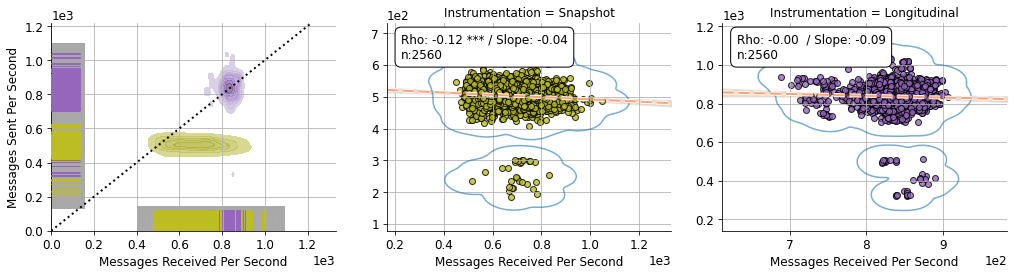

100%|██████████| 5/5 [00:00<00:00, 29.98it/s]


teeplots/./allocation=with-lac-417+hue=instrumentation+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.pdf
skipping teeplots/./allocation=with-lac-417+hue=instrumentation+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.png


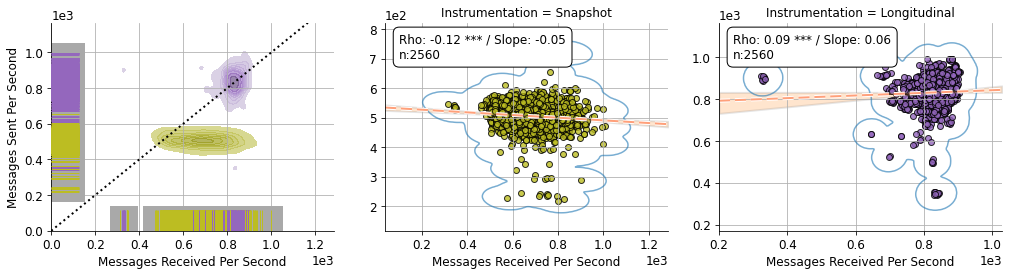

In [7]:
for allocation, group in data.groupby("Allocation"):
    group_df = group.reset_index()
    tp.tee(
        beleaguerment_facetplot,
        data=rename_allocation(group_df),
        x="Messages Received Per Second",
        y="Messages Sent Per Second",
        hue="Instrumentation",
        rugplot_kwargs={
            "alpha": 1.0,
            "linewidth": 1,
            "batch_limit": 5,
            "progress_apply": tqdm,
        },
        teeplot_outattrs={
            "allocation": slugify(allocation),
        },
    )
    plt.show()
